# Trabajo Fin de Grado. Predicción de precios de instancias “spot” en la nube de Amazon


## Realizado por: Luis Mendoza Montero

***Desarrollo del trabajo:***

Preprocesamiento de los datos, coeficiente de Gini, Índice de Theil y Promedio Móvil Ponderado Exponencial



# 1. Preprocesado de Datos

### Seleccionar region y categoría (tabla de la BBDD)

In [1]:
region = "'C4_ap_southeast_1'"

### Seleccionar tipo de Sistema Operativo

Existes 3 tipos de sistemas: ***Windows, Linux/UNIX o SUSE Linux***

In [2]:
sistema = "SUSE Linux"

### Cargando paquetes

In [2]:
import datetime
import sqlite3
import csv
import sys
import random
import datetime, time
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob; from os.path import expanduser

Sacamos las zonas de disponibilidad, los sistemas operativos y las fechas de las instancias

In [4]:
# Conectar con la base de datos
with sqlite3.connect("BBDD.db") as connection:
    
    # Sacamos el tipo de istancia (nombre + familia)
    instances = pd.read_sql("SELECT DISTINCT InstanceType FROM "+region+";", connection) 
    instances_list = instances.values.tolist()
    del instances_list[0]
    
    for inst in instances_list:
        instance=inst[0] # En la variable instance tenemos el tipo de instancia
    print(instance)
    
    # Sacamos las zonas de disponibilidad
    zones = pd.read_sql("SELECT DISTINCT AvailabilityZone FROM "+region+";", connection) 
    zones_list = zones.values.tolist()
    del zones_list[0]
    
    listaRegiones = []
    for zone in zones_list:
        for zo in zone:
            listaRegiones.append(zo) # Lista de zonas en la región
    
    # Para cada zona y SO indicado sacamos el dia, el mes y el año
    for zona in listaRegiones: 
        #for sistema in listaSistemas:
        dates = pd.read_sql("SELECT DISTINCT SUBSTR(Timestamp, 1, 10) FROM "+region+"WHERE AvailabilityZone = '"+zona+"'AND Description = '"+sistema+"';", connection)
        dates_list = dates.values.tolist()
    
    listaFechas = []
    for date in dates_list:
        for da in date:
            listaFechas.append(da) # Lista de fechas en cada zona y SO

# Cerrar la conexión siempre
connection.close()

c4.2xlarge


### Seleccionar Zona de Disponibilidad

Elegir entre una de las siguientes zonas de disponibilidad:

In [5]:
print(listaRegiones)

['ap-southeast-1a', 'ap-southeast-1b', 'ap-southeast-1c']


In [6]:
zona = "ap-southeast-1a"

### Completamos datos preprocesados

In [7]:

# Conectar con la base de datos, si no existe la crea automáticamente
conexion = sqlite3.connect("BBDD.db")
    
# Para poder ejecutar código SQL, tenemos que crear un cursor primero, el nombre de la tabla será la familia de las categorías
cursor = conexion.cursor()
cursor.execute("DROP TABLE IF EXISTS Preprocesados;")
cursor.execute("CREATE TABLE IF NOT EXISTS Preprocesados (AvailabilityZone VARCHAR(100), Description VARCHAR(100), InstanceType VARCHAR(100), SpotPrice FLOAT(8,4), Timestamp Datetime, PRIMARY KEY('AvailabilityZone','InstanceType','Timestamp','Description'))")

# Insertamos los nombre de los atributos para que se tenga en cuenta en formato csv
cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ('AvailabilityZone','Description','InstanceType','SpotPrice','Timestamp');")      

lista = [] # variable auxiliar por si no hay precios en algunas horas para meter el anterior más mayor
lista.append(0.0)
aux = '0'
#for zona in listaRegiones:
for fecha in listaFechas:
            
            # Para las 00:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T00:00:00.000z' AND Timestamp <='"+fecha+"T00:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T00:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T00:00:00.000Z');")
                aux = str(precio)
                
            # Para las 01:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T01:00:00.000z' AND Timestamp <='"+fecha+"T01:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T01:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T01:00:00.000Z');")
                aux = str(precio)
           
            # Para las 02:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T02:00:00.000z' AND Timestamp <='"+fecha+"T02:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T02:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T02:00:00.000Z');")
                aux = str(precio)

                
            # Para las 03:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T03:00:00.000z' AND Timestamp <='"+fecha+"T03:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T03:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T03:00:00.000Z');")
                aux = str(precio)
    
                
            # Para las 04:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T04:00:00.000z' AND Timestamp <='"+fecha+"T04:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T04:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T04:00:00.000Z');")
                aux = str(precio)
                    
            
            # Para las 05:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T05:00:00.000z' AND Timestamp <='"+fecha+"T05:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T05:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T05:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 06:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T06:00:00.000z' AND Timestamp <='"+fecha+"T06:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T06:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T06:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 07:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T07:00:00.000z' AND Timestamp <='"+fecha+"T07:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T07:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T07:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 08:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T08:00:00.000z' AND Timestamp <='"+fecha+"T08:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T08:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T08:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 09:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T09:00:00.000z' AND Timestamp <='"+fecha+"T09:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T09:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T09:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 10:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T10:00:00.000z' AND Timestamp <='"+fecha+"T10:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T10:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T10:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 11:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T11:00:00.000z' AND Timestamp <='"+fecha+"T11:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T11:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T11:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 12:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T12:00:00.000z' AND Timestamp <='"+fecha+"T12:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T12:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T12:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 13:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T13:00:00.000z' AND Timestamp <='"+fecha+"T13:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T13:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T13:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 14:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T14:00:00.000z' AND Timestamp <='"+fecha+"T14:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T14:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T14:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 15:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T15:00:00.000z' AND Timestamp <='"+fecha+"T15:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T15:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T15:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 16:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T16:00:00.000z' AND Timestamp <='"+fecha+"T16:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T16:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T16:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 17:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T17:00:00.000z' AND Timestamp <='"+fecha+"T17:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T17:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T17:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 18:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T18:00:00.000z' AND Timestamp <='"+fecha+"T18:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T18:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T18:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 19:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T19:00:00.000z' AND Timestamp <='"+fecha+"T19:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T19:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T19:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 20:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T20:00:00.000z' AND Timestamp <='"+fecha+"T20:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T20:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T20:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 21:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T21:00:00.000z' AND Timestamp <='"+fecha+"T21:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T21:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T21:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 22:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T22:00:00.000z' AND Timestamp <='"+fecha+"T22:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T22:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T22:00:00.000Z');")
                aux = str(precio)
                    
                
            # Para las 23:00:00
            price = pd.read_sql("SELECT MAX(SpotPrice) FROM "+region+"WHERE SpotPrice<>'SpotPrice' AND AvailabilityZone='"+zona+"' AND Description = '"+sistema+"' AND Timestamp >='"+fecha+"T23:00:00.000z' AND Timestamp <='"+fecha+"T23:59:59.000z';",conexion)
            precios = price.values.tolist()
            for prec in precios:
                precio = str(prec[0])
            if precio == 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+aux+"','"+fecha+"T23:00:00.000Z');")
            elif precio != 'None':
                cursor.execute("INSERT OR IGNORE INTO Preprocesados VALUES ("+"'"+zona+"',"+"'"+sistema+"','"+instance+"','"+precio+"','"+fecha+"T23:00:00.000Z');")
                aux = str(precio)
                   

# Eliminamos los registros donde el precio sea 0
cursor.execute("DELETE FROM Preprocesados WHERE SpotPrice = 0.0")
            
#print(lista)

# Guardamos los cambios haciendo un commit
conexion.commit()
    
# Cerrar la conexión siempre
connection.close()


### Recoger datos preprocesados

In [8]:
# Conectar con la base de datos
with sqlite3.connect("BBDD.db") as connection:
    # Abrimos el csv a insertar los datos
    csvWriter = csv.writer(open("datos.csv", "w"))
    # Creamos el cursor
    c = connection.cursor()
    # Hacemos la consulta
    data = c.execute("SELECT * FROM Preprocesados ORDER BY Timestamp Desc") # Ordenamos los datos desde el más reciente al menos
    # Insertamos los datos en el dataset
    rows = data.fetchall()
    csvWriter.writerows(rows)

# Cerrar la conexión siempre
connection.close()

### Cargamos el dataframe

Ahora recogemos los datos y los insertamos al dataframe además de hacer una muestra de los 15 primeros datos para verificar que todo ha salido bien

In [2]:
df = pd.read_csv("datos.csv")
df.head(15)

NameError: name 'pd' is not defined

### Mostramos la gráfica correspondiente a la zona de disponibilidad

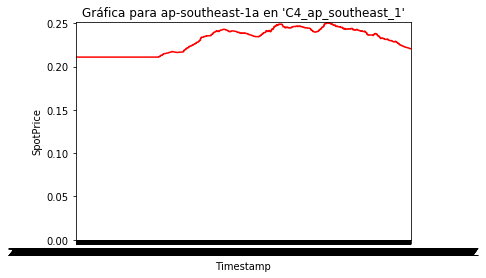

In [10]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from pylab import *

x = df['Timestamp']
y = df['SpotPrice']

figure()
plt.plot(x, y, 'r')
plt.axis([0,max(x),0,max(y)])
xlabel('Timestamp')
ylabel('SpotPrice')
title('Gráfica para '+zona+ ' en '+ region)
show()


# 2. Coeficiente de Gini

***El coeficiente de Gini*** es una medida estadística de la desigualdad entre los valores de una distribución de frecuencia, como el ingreso o la riqueza. El coeficiente de Gini devuelve un valor entre 0 y 1 donde:

- Un coeficiente de Gini con valor 0, implica la igualdad absoluta, es decir, todos los valores en la distribución son iguales.
- Un coeficiente de Gini con valor 1, implica la máxima desigualdad entre los valores.

El coeficiente de Gini se puede calcular como una medida resumida de los datos del precio Spot para cada mercado Amazon EC2 Spot. Se puede usar para caracterizar la desigualdad general en los precios Spot:

-	Un Gini bajo (entre 0 y 0,2) indica que el mercado Spot es homogéneo, es decir, los precios Spot siguen aproximadamente una distribución normal con una desviación muy pequeña de la media.
-	Un Gini alto (entre 0.6 y 1.0) indica que el mercado Spot tiene picos infrecuentes pero muy altos del precio Spot promedio.
-	Un Gini de rango medio (entre 0.2 y 0.6) indica que hay varios picos altos (pero no extremos) del precio Spot promedio.

### Algoritmo Coeficiente de Gini

In [6]:
import statistics as stats
import math

def gini(list_of_values):
    mean = (stats.mean(list_of_values)) # Calculamos la media de todos los valores de los precios
    nvalues = len(list_of_values) # En nvalues tenemos el número de valores totales
    sumvalues = 0
    for value1 in list_of_values: # Para cada uno de los valores
        for value2 in list_of_values: 
            sumvalues += math.fabs(value1 - value2) # Sumamos la diferencia de cada par
    result = sumvalues/((2*(nvalues**2))*mean) # Como resultado final dividimos la suma entre 2 por el número de valores al cuadrado por la media
    return result

### Eliminación de variables para Gini

Eliminamos las variables que no necesitemos para Gini

In [7]:
# Solo me quedo con el SpotPrice y el Timestamp
dfGini = df

dfGini = dfGini.drop('AvailabilityZone', 1)
dfGini = dfGini.drop('InstanceType', 1)
dfGini = dfGini.drop('Description', 1)

ValueError: labels ['AvailabilityZone'] not contained in axis

### Gini para último mes

Me quedo con la última semana para test y las 4 anteriores para training

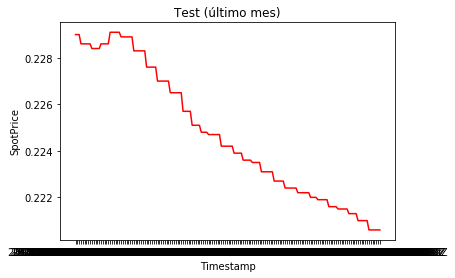

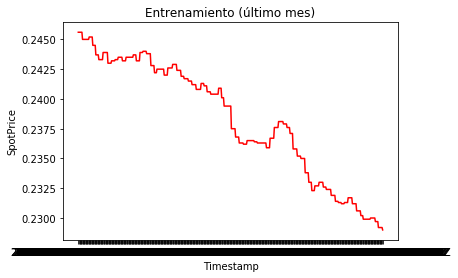

In [13]:
Test_GiniMounth = dfGini.head(24*7) # 1 semana para Test
Training_GiniMounth = dfGini.iloc[24*7:24*7*4] # 24 horas * 7 días (una semana) * 4 (4 semanas) para Training

x1 = Test_GiniMounth['Timestamp']
y1 = Test_GiniMounth['SpotPrice']

figure()
plt.plot(x1, y1, 'r')
#plt.axis([0,max(x),0,max(y)])
xlabel('Timestamp')
ylabel('SpotPrice')
title('Test (último mes)')
show()

x2 = Training_GiniMounth['Timestamp']
y2 = Training_GiniMounth['SpotPrice']

figure()
plt.plot(x2, y2, 'r')
#plt.axis([0,max(x),0,max(y)])
xlabel('Timestamp')
ylabel('SpotPrice')
title('Entrenamiento (último mes)')
show()

### Ejecución algoritmo de Gini para último mes

In [14]:
gini_coefficient = (gini(Training_GiniMounth['SpotPrice']))
print("El coeficiente de Gini para el último mes es de:",gini_coefficient)

El coeficiente de Gini para el último mes es de: 0.0116969519953


### Gini para última semana

Me quedo con el último día para test y los 7 días anteriores para training

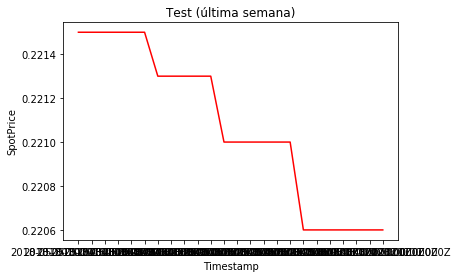

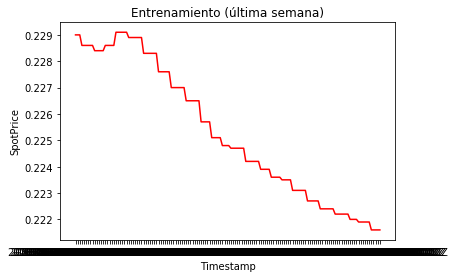

In [15]:
Test_GiniWeek = dfGini.head(24) # 1 día para Test
Training_GiniWeek = dfGini.iloc[24:24*7] # 24 horas * 7 días (última semana) para Training

x1 = Test_GiniWeek['Timestamp']
y1 = Test_GiniWeek['SpotPrice']

figure()
plt.plot(x1, y1, 'r')
#plt.axis([0,max(x),0,max(y)])
xlabel('Timestamp')
ylabel('SpotPrice')
title('Test (última semana)')
show()

x2 = Training_GiniWeek['Timestamp']
y2 = Training_GiniWeek['SpotPrice']

figure()
plt.plot(x2, y2, 'r')
#plt.axis([0,max(x),0,max(y)])
xlabel('Timestamp')
ylabel('SpotPrice')
title('Entrenamiento (última semana)')
show()

### Ejecución algoritmo de Gini para última semana

In [16]:
gini_coefficient = (gini(Training_GiniWeek['SpotPrice']))
print("El coeficiente de Gini para la última semana es de:",gini_coefficient)

El coeficiente de Gini para la última semana es de: 0.00649627354674


# 3. Índice de Theil

El índice de Theil también medirá la desigualdad entre los valores pero en lugar de tener en cuenta un solo grupo de datos, tendremos en cuenta más de uno.

### Eliminación de variables para Theil

In [17]:
# Solo me quedo con el SpotPrice y el Timestamp
dfTheil = df

dfTheil = dfTheil.drop('AvailabilityZone', 1)
dfTheil = dfTheil.drop('InstanceType', 1)
dfTheil = dfTheil.drop('Description', 1)


### Particiones

In [18]:
# Importaremos una librería de Python para hacer expresiones regulares y parsear la fecha del Timestamp para dividir los datos

from datetime import datetime, date, time, timedelta
import calendar
import re

patron0 = re.compile('[0-9]+-[0-9]+-[0-9]+T00:00:00.000Z')
patron1 = re.compile('[0-9]+-[0-9]+-[0-9]+T01:00:00.000Z')
patron2 = re.compile('[0-9]+-[0-9]+-[0-9]+T02:00:00.000Z')
patron3 = re.compile('[0-9]+-[0-9]+-[0-9]+T03:00:00.000Z')
patron4 = re.compile('[0-9]+-[0-9]+-[0-9]+T04:00:00.000Z')
patron5 = re.compile('[0-9]+-[0-9]+-[0-9]+T05:00:00.000Z')
patron6 = re.compile('[0-9]+-[0-9]+-[0-9]+T06:00:00.000Z')
patron7 = re.compile('[0-9]+-[0-9]+-[0-9]+T07:00:00.000Z')
patron8 = re.compile('[0-9]+-[0-9]+-[0-9]+T08:00:00.000Z')
patron9 = re.compile('[0-9]+-[0-9]+-[0-9]+T09:00:00.000Z')
patron10 = re.compile('[0-9]+-[0-9]+-[0-9]+T10:00:00.000Z')
patron11 = re.compile('[0-9]+-[0-9]+-[0-9]+T11:00:00.000Z')
patron12 = re.compile('[0-9]+-[0-9]+-[0-9]+T12:00:00.000Z')
patron13 = re.compile('[0-9]+-[0-9]+-[0-9]+T13:00:00.000Z')
patron14 = re.compile('[0-9]+-[0-9]+-[0-9]+T14:00:00.000Z')
patron15 = re.compile('[0-9]+-[0-9]+-[0-9]+T15:00:00.000Z')
patron16 = re.compile('[0-9]+-[0-9]+-[0-9]+T16:00:00.000Z')
patron17 = re.compile('[0-9]+-[0-9]+-[0-9]+T17:00:00.000Z')
patron18 = re.compile('[0-9]+-[0-9]+-[0-9]+T18:00:00.000Z')
patron19 = re.compile('[0-9]+-[0-9]+-[0-9]+T19:00:00.000Z')
patron20 = re.compile('[0-9]+-[0-9]+-[0-9]+T20:00:00.000Z')
patron21 = re.compile('[0-9]+-[0-9]+-[0-9]+T21:00:00.000Z')
patron22 = re.compile('[0-9]+-[0-9]+-[0-9]+T22:00:00.000Z')
patron23 = re.compile('[0-9]+-[0-9]+-[0-9]+T23:00:00.000Z')

listaG = []
lista0 = []

list_dfTheil = dfTheil.values.tolist()

# dfTheil0: PARTICIÓN PARA LAS 00:00
for list1 in list_dfTheil:
    if(patron0.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil0 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil0.loc[len(dfTheil0)] = row
listaG = []

# dfTheil1: PARTICIÓN PARA LAS 01:00
for list1 in list_dfTheil:
    if(patron1.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil1 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil1.loc[len(dfTheil1)] = row
listaG = []

# dfTheil2: PARTICIÓN PARA LAS 02:00
for list1 in list_dfTheil:
    if(patron2.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil2 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil2.loc[len(dfTheil2)] = row
listaG = []  

# dfTheil3: PARTICIÓN PARA LAS 03:00
for list1 in list_dfTheil:
    if(patron3.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil3 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil3.loc[len(dfTheil3)] = row
listaG = []   

# dfTheil4 PARTICIÓN PARA LAS 04:00
for list1 in list_dfTheil:
    if(patron4.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil4 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil4.loc[len(dfTheil4)] = row
listaG = [] 

# dfTheil5: PARTICIÓN PARA LAS 05:00
for list1 in list_dfTheil:
    if(patron5.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil5 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil5.loc[len(dfTheil5)] = row
listaG = [] 

# dfTheil6: PARTICIÓN PARA LAS 06:00
for list1 in list_dfTheil:
    if(patron6.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil6 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil6.loc[len(dfTheil6)] = row
listaG = [] 

# dfTheil7: PARTICIÓN PARA LAS 07:00
for list1 in list_dfTheil:
    if(patron7.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil7 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil7.loc[len(dfTheil7)] = row
listaG = [] 

# dfTheil8: PARTICIÓN PARA LAS 08:00
for list1 in list_dfTheil:
    if(patron8.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil8 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil8.loc[len(dfTheil8)] = row
listaG = [] 

# dfTheil9: PARTICIÓN PARA LAS 09:00
for list1 in list_dfTheil:
    if(patron9.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil9 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil9.loc[len(dfTheil9)] = row
listaG = [] 

# dfTheil10: PARTICIÓN PARA LAS 10:00
for list1 in list_dfTheil:
    if(patron10.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil10 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil10.loc[len(dfTheil10)] = row
listaG = [] 

# dfTheil11: PARTICIÓN PARA LAS 11:00
for list1 in list_dfTheil:
    if(patron11.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil11 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil11.loc[len(dfTheil11)] = row
listaG = [] 

# dfTheil12: PARTICIÓN PARA LAS 12:00
for list1 in list_dfTheil:
    if(patron12.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil12 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil12.loc[len(dfTheil12)] = row
listaG = [] 

# dfTheil13: PARTICIÓN PARA LAS 13:00
for list1 in list_dfTheil:
    if(patron13.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil13 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil13.loc[len(dfTheil13)] = row
listaG = [] 

# dfTheil14: PARTICIÓN PARA LAS 14:00
for list1 in list_dfTheil:
    if(patron14.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil14 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil14.loc[len(dfTheil14)] = row
listaG = [] 

# dfTheil15: PARTICIÓN PARA LAS 15:00
for list1 in list_dfTheil:
    if(patron15.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil15 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil15.loc[len(dfTheil15)] = row
listaG = [] 

# dfTheil16: PARTICIÓN PARA LAS 16:00
for list1 in list_dfTheil:
    if(patron16.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil16 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil16.loc[len(dfTheil16)] = row
listaG = [] 

# dfTheil17: PARTICIÓN PARA LAS 17:00
for list1 in list_dfTheil:
    if(patron17.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil17 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil17.loc[len(dfTheil17)] = row
listaG = [] 

# dfTheil18: PARTICIÓN PARA LAS 18:00
for list1 in list_dfTheil:
    if(patron18.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil18 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil18.loc[len(dfTheil18)] = row
listaG = [] 

# dfTheil19: PARTICIÓN PARA LAS 19:00
for list1 in list_dfTheil:
    if(patron19.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil19 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil19.loc[len(dfTheil19)] = row
listaG = [] 

# dfTheil20: PARTICIÓN PARA LAS 20:00
for list1 in list_dfTheil:
    if(patron20.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil20 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil20.loc[len(dfTheil20)] = row
listaG = [] 

# dfTheil21: PARTICIÓN PARA LAS 21:00
for list1 in list_dfTheil:
    if(patron21.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil21 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil21.loc[len(dfTheil21)] = row
listaG = [] 

# dfTheil22: PARTICIÓN PARA LAS 22:00
for list1 in list_dfTheil:
    if(patron22.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil22 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil22.loc[len(dfTheil22)] = row
listaG = [] 

# dfTheil23: PARTICIÓN PARA LAS 23:00
for list1 in list_dfTheil:
    if(patron23.search(list1[1])):
        lista0.append(list1[0])
        lista0.append(list1[1])
        listaG.append(lista0)
        lista0 = []     
mycolumns = ['SpotPrice', 'Timestamp']
dfTheil23 = pd.DataFrame(columns=mycolumns)
rows = listaG
for row in rows:
    dfTheil23.loc[len(dfTheil23)] = row
listaG = [] 



In [19]:
# Algoritmo Índice de Theil

list_dfTheil0 = dfTheil0.values.tolist()
list_dfTheil1 = dfTheil1.values.tolist()
list_dfTheil2 = dfTheil2.values.tolist()
list_dfTheil3 = dfTheil3.values.tolist()
list_dfTheil4 = dfTheil4.values.tolist()
list_dfTheil5 = dfTheil5.values.tolist()
list_dfTheil6 = dfTheil6.values.tolist()
list_dfTheil7 = dfTheil7.values.tolist()
list_dfTheil8 = dfTheil8.values.tolist()
list_dfTheil9 = dfTheil9.values.tolist()
list_dfTheil10 = dfTheil10.values.tolist()
list_dfTheil11 = dfTheil11.values.tolist()
list_dfTheil12 = dfTheil12.values.tolist()
list_dfTheil13 = dfTheil13.values.tolist()
list_dfTheil14 = dfTheil14.values.tolist()
list_dfTheil15 = dfTheil15.values.tolist()
list_dfTheil16 = dfTheil16.values.tolist()
list_dfTheil17 = dfTheil17.values.tolist()
list_dfTheil18 = dfTheil18.values.tolist()
list_dfTheil19 = dfTheil19.values.tolist()
list_dfTheil20 = dfTheil20.values.tolist()
list_dfTheil21 = dfTheil21.values.tolist()
list_dfTheil22 = dfTheil22.values.tolist()
list_dfTheil23 = dfTheil23.values.tolist()
list_dfTheil = dfTheil.values.tolist() # Lista con los elementos del dataframe completo

X = float(sum(dfTheil['SpotPrice'])) # Conjunto X
n = float(len(dfTheil)) # n valores totales de todo el conjunto

Partition = [] # Particionamiento
Partition.append(list_dfTheil0)
Partition.append(list_dfTheil1)
Partition.append(list_dfTheil2)
Partition.append(list_dfTheil3)
Partition.append(list_dfTheil4)
Partition.append(list_dfTheil5)
Partition.append(list_dfTheil6)
Partition.append(list_dfTheil7)
Partition.append(list_dfTheil8)
Partition.append(list_dfTheil9)
Partition.append(list_dfTheil10)
Partition.append(list_dfTheil11)
Partition.append(list_dfTheil12)
Partition.append(list_dfTheil13)
Partition.append(list_dfTheil14)
Partition.append(list_dfTheil15)
Partition.append(list_dfTheil16)
Partition.append(list_dfTheil17)
Partition.append(list_dfTheil18)
Partition.append(list_dfTheil19)
Partition.append(list_dfTheil20)
Partition.append(list_dfTheil21)
Partition.append(list_dfTheil22)
Partition.append(list_dfTheil23)

Xg = 0.0
lenXg = 0.0
Ib = 0.0

# Calculamos Ib
for grupo in range(0,len(Partition)):
    for i in Partition[grupo]:
        lenXg += 1.0
        Xg += float(i[0])
    Ib += ((Xg/X) * log((Xg/X)/(lenXg/n)))
    Xg = 0.0
    lenXg = 0.0
print("El valor de Ib es de:",Ib)

# Calculamos Iw
Iw2 = 0.0
Iw = 0.0
for grupo in range(0,len(Partition)):
    for i in Partition[grupo]:
        lenXg += 1.0
        Xg += float(i[0])
    for i in Partition[grupo]:
        xgi = i[0]
        Iw2 += (xgi/Xg * log((xgi/Xg)/(1/lenXg)))
    Iw += (Xg/X)*Iw2
    Iw2 = 0.0
print("El valor de Iw es de:",Iw)

# Calculamos I
I = Ib + Iw
print("El valor de I es de:",I)

# Calculamos Rb
Rb = Ib/I
print("El valor de Rb es de:",Rb)


El valor de Ib es de: 2.11979930176e-08
El valor de Iw es de: 0.00191014178597
El valor de I es de: 0.00191016298396
El valor de Rb es de: 1.10974786946e-05


# 4. Promedio Móvil Ponderado Exponencial (Weighted Average)

Para llevar a cabo el promedio móvil ponderado (Weighted Average) consideraremos al igual que con Gini una ejecución para la última semana y otra para el último mes aproximadamente

### Eliminación de variables para Weighted Average

In [20]:
# Solo me quedo con el SpotPrice y con el Timestamp
dfProm = df

dfProm = dfProm.drop('AvailabilityZone', 1)
dfProm = dfProm.drop('InstanceType', 1)
dfProm = dfProm.drop('Description', 1)
dfProm = dfProm.drop('Timestamp', 1)

### Ejecución algoritmo Promedio Móvil Ponderado para último mes

### Algoritmo Promedio Móvil Ponderado Exponencial (Weighted Average)

In [21]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    k = 0
    lista1 = []
    lista2 = []
    lista3 = []
    
    for m in range(len(weights)):
        lista1 = (series.iloc[k:k+int(len(series)/len(weights))])
        lista2.append(lista1)
        k = k + int(len(series)/len(weights))
        
    for n in range(len(lista2)):
        suma = 0
        mean = 0
        for l,i in enumerate(lista2[n]):
            suma += i
        mean = suma / len(lista2[n])
        lista3.append(mean)
        
    for n in range(len(weights)):
        result += lista3[n] * weights[n]
    return result


### Ejecución algoritmo Weighted Average para último mes

In [22]:
# Añadimos la lista de forma incremental
weights = [0.1, 0.2, 0.3, 0.4] # lista de pesos, uno por semana

Test_PromMonth = dfProm.head(24*7) # 1 semana para Test
Training_PromMonth = dfProm.iloc[24*7:24*35] # 4 semanas para Training

wa = weighted_average(Training_PromMonth['SpotPrice'],weights)
print("El algoritmo ponderado exponencial para el último mes es de",wa)

El algoritmo ponderado exponencial para el último mes es de 0.238174880952


### Ejecución algoritmo Weighted Average para última semana

In [23]:
# Añadimos la lista de forma incremental
weights = [0.01, 0.03, 0.06, 0.15, 0.20, 0.25, 0.30] # lista de pesos, uno por día de la semana

Test_PromWeek = dfProm.head(24) # 1 día para Test
Training_PromWeek = dfProm.iloc[24*2:24*8] # 7 días para Training

wa = weighted_average(Training_PromWeek['SpotPrice'],weights)
print("El algoritmo ponderado exponencial para la última semana es de",wa)

El algoritmo ponderado exponencial para la última semana es de 0.224737
